In [1]:
import numpy as np
import pde
import matplotlib.pyplot as plt



In [2]:
def sim_numerical_growth_diffusion(u0, g_x, L, T_cycle, num_T, beta_u, beta_g=0, bc_x = ({"value": 0}, {"value": 0}), IsPeriodic=False, IsPlot=False):
    expr = {'u' : f'laplace(u) * {beta_u} + g * u', 
        'g' : f'{beta_g} * laplace(g)'}
    
    if IsPeriodic:
        eq = pde.PDE(expr)
    else:    
        eq = pde.PDE(expr, bc=[bc_x, ])
    grid = pde.UnitGrid([L,], periodic=IsPeriodic) # unit grid, for each well
    

    # Construct the field objects
    initial_u = pde.ScalarField(grid, data=u0)
    initial_g = pde.ScalarField(grid, data=g_x)
    # Set the initial values for all fields, and show it
    initial_state = pde.FieldCollection([initial_u,initial_g])
   

    # simulate the dynamics
    storage = pde.MemoryStorage()
    final_state = eq.solve(state=initial_state, 
                           t_range=num_T*T_cycle, 
                           dt=T_cycle, 
                           tracker=['progress', storage.tracker(T_cycle)],
                           solver="scipy", # DEFAULT: solver: str | SolverBase = "explicit"
                           ret_info = False,)   
    if IsPlot:
      print("Initial state:")
      print("Left panel: population density u, right panel: growth rate g")
      initial_state.plot(title='Initial state')
      
      print("Final state:")
      print("Left panel: population density u, right panel: growth rate g")
      final_state.plot(title=f'Final state, T={num_T*T_cycle}')
    
    return storage


## an example for homogeneous drug environment

100%|██████████| 4.0/4.0 [00:12<00:00,  3.25s/it]    

Initial state:
Left panel: population density u, right panel: growth rate g


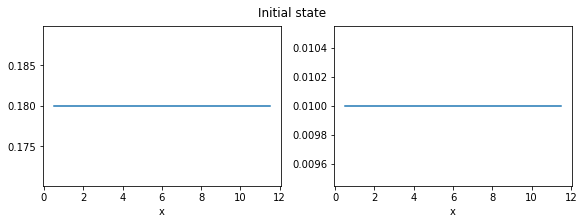

Final state:
Left panel: population density u, right panel: growth rate g


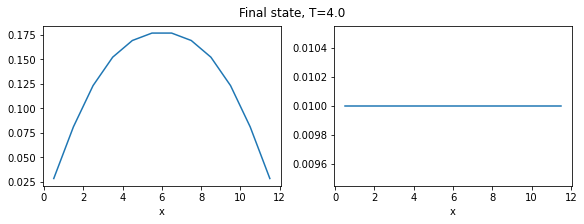

In [3]:
# a test example for homo
u0=[0.18]*12
g_x = [0.01]*12
L=12
T_cycle=0.5 #h
num_T=8
beta_u=0.9

sim_numerical_growth_diffusion(u0, g_x, L, T_cycle, num_T, beta_u, beta_g=0, bc_x = ({"value": 0}, {"value": 0}), IsPeriodic=False, IsPlot=True)

## an example for heterogeneous drug environment

100%|██████████| 4.0/4.0 [00:07<00:00,  1.78s/it]    

Initial state:
Left panel: population density u, right panel: growth rate g


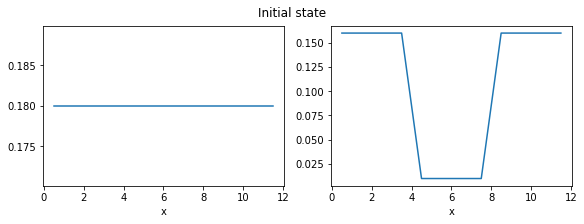

Final state:
Left panel: population density u, right panel: growth rate g


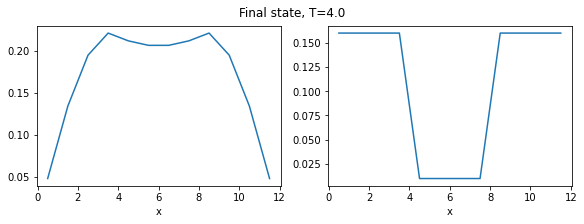

In [4]:
# a test example for hetero, CL spatial arrangement
g_h,g_l=0.16,0.01
u0=[0.18]*12
g_x = [g_h,g_h,g_h,g_h,g_l,g_l,g_l,g_l,g_h,g_h,g_h,g_h]
L=12
T_cycle=0.5 #h
num_T=8
beta_u=0.9

sim_numerical_growth_diffusion(u0, g_x, L, T_cycle, num_T, beta_u, beta_g=0, bc_x = ({"value": 0}, {"value": 0}), IsPeriodic=False, IsPlot=True)

100%|██████████| 4.0/4.0 [00:08<00:00,  2.11s/it]    

Initial state:
Left panel: population density u, right panel: growth rate g


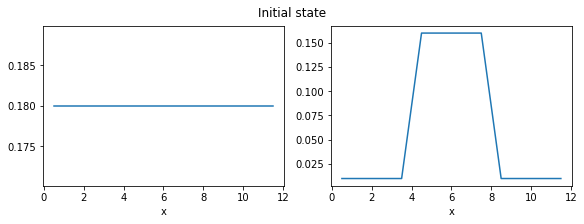

Final state:
Left panel: population density u, right panel: growth rate g


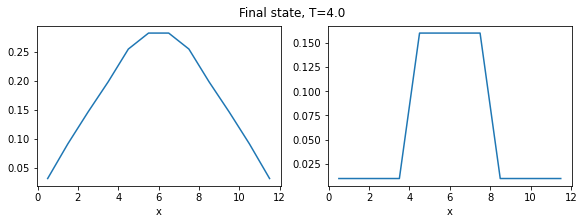

In [5]:
# a test example for hetero, CH spatial arrangement
g_h,g_l=0.16,0.01
u0=[0.18]*12
g_x = [g_l,g_l,g_l,g_l,g_h,g_h,g_h,g_h,g_l,g_l,g_l,g_l]
L=12
T_cycle=0.5 #h
num_T=8
beta_u=0.9

sim_numerical_growth_diffusion(u0, g_x, L, T_cycle, num_T, beta_u, beta_g=0, bc_x = ({"value": 0}, {"value": 0}), IsPeriodic=False, IsPlot=True)